# Brincando com TensorFlow - Meetup GDG
# Modelo Simples Linear

## Introdução

Este tutorial demonstra o fluxo de trabalho básico do uso do TensorFlow com um modelo linear simples. Depois de carregar o chamado conjunto de dados MNIST com imagens de dígitos escritos à mão, definimos e otimizamos um modelo matemático simples em TensorFlow. Os resultados são então plotados e discutidos.

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

This was developed using Python 3.6 (Anaconda) and TensorFlow version:

In [2]:
tf.__version__

'1.5.0'

In [3]:
hello=tf.constant('Hello, TensorFlow!')
sess=tf.Session()
print(sess.run(hello))

a=tf.constant(10)
b=tf.constant(32)
print(sess.run(a + b))

b'Hello, TensorFlow!'
42


## Load Data

O conjunto de dados MNIST é de cerca de 10 MB e será baixado automaticamente se não estiver localizado no caminho fornecido.

In [9]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/MNIST/", one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


O conjunto de dados MNIST foi agora carregado e consiste em 40.000 imagens e números de classe para as imagens. O conjunto de dados é dividido em 3 subconjuntos mutuamente exclusivos. Nós usaremos somente os conjuntos de treinamento e teste neste tutorial.

In [10]:
print("Number of training examples:", mnist.train.num_examples)
print("Number of validation examples:", mnist.validation.num_examples)
print("Number of testing examples:", mnist.test.num_examples)

Number of training examples: 55000
Number of validation examples: 5000
Number of testing examples: 10000


Copie algumas das dimensões de dados por conveniência.

In [12]:
print(mnist.train.images.shape, mnist.train.labels.shape)
print(mnist.validation.images.shape, mnist.validation.labels.shape)
print(mnist.test.images.shape, mnist.test.labels.shape)

(55000, 784) (55000, 10)
(5000, 784) (5000, 10)
(10000, 784) (10000, 10)


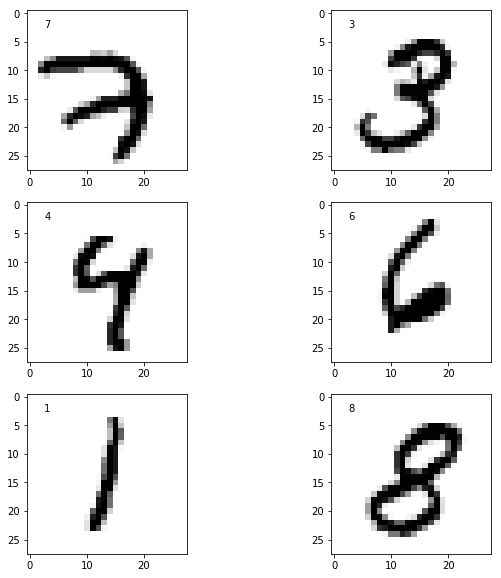

In [14]:
left= 2.5
top = 2.5

fig = plt.figure(figsize=(10,10))

for i in range(6):
    ax = fig.add_subplot(3,2,i+1)
    im = np.reshape(mnist.train.images[i,:], [28,28])

    label = np.argmax(mnist.train.labels[i,:])
    ax.imshow(im, cmap='Greys')
    ax.text(left, top, str(label))

## TensorFlow Graph

Todo o propósito do TensorFlow é ter um chamado gráfico computacional que pode ser executado com muito mais eficiência do que se os mesmos cálculos fossem executados diretamente no Python. O TensorFlow pode ser mais eficiente que o NumPy, porque o TensorFlow conhece todo o gráfico de computação que deve ser executado, enquanto o NumPy só conhece o cálculo de uma única operação matemática por vez.

O TensorFlow também pode calcular automaticamente os gradientes necessários para otimizar as variáveis ​​do gráfico, a fim de melhorar o desempenho do modelo. Isso ocorre porque o gráfico é uma combinação de expressões matemáticas simples para que o gradiente do gráfico inteiro possa ser calculado usando a regra da cadeia para derivadas.

O TensorFlow também pode aproveitar CPUs multi-core, bem como GPUs - e o Google até criou chips especiais para o TensorFlow, que são chamados de TPUs (Tensor Processing Units), que são ainda mais rápidos que os GPUs.

Um gráfico do TensorFlow consiste nas seguintes partes, que serão detalhadas abaixo:

* Variáveis de placeholder usadas para alimentar a entrada no gráfico.
* Variáveis do modelo que serão otimizadas para que o modelo tenha um melhor desempenho.
* O modelo que é essencialmente apenas uma função matemática que calcula alguma saída, dada a entrada nas variáveis de espaço reservado e as variáveis do modelo.
* Uma medida de custo que pode ser usada para guiar a otimização das variáveis.
* Um método de otimização que atualiza as variáveis do modelo.

Além disso, o gráfico TensorFlow também pode conter várias declarações de depuração, por ex. para registrar os dados a serem exibidos usando o TensorBoard.

### Placeholder variables

As variáveis de espaço reservado servem como entrada para o gráfico que podemos alterar a cada vez que executamos o gráfico. Chamamos isso de alimentar as variáveis de espaço reservado e isso é demonstrado mais adiante.

Primeiro, definimos a variável de espaço reservado para as imagens de entrada. Isso nos permite alterar as imagens que são inseridas no gráfico do TensorFlow. Este é um chamado tensor, o que significa apenas que é um vetor ou matriz multidimensional. O tipo de dados é definido como float32 e a forma é definida como [None, tamanho], onde None significa que o tensor pode conter um número arbitrário de imagens, sendo cada imagem um vetor de comprimento x, w e b.

In [20]:
# A placeholder for the data (inputs and outputs)
x = tf.placeholder(tf.float32, [None, 784])

# W: the weights for each pixel for each class
# b: bias of each class
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

### Model


Esse modelo matemático simples multiplica as imagens na variável de espaço reservado x com os pesos e adiciona os vieses.

Note que o nome logits é uma terminologia típica do TensorFlow, mas outras pessoas podem chamar a variável de outra coisa.

## Softmax:

Queremos dar probabilidades de que uma determinada imagem é um dígito. A regressão Softmax fornece uma lista de valores entre 0 e 1 que somam 1. Também podemos treinar modelos mais sofisticados, com uma etapa final de uma camada de softmax (é um link ou uma função de ativação).

Dois passos para softmax:

Adicione evidências de entrada em uma determinada classe usando uma soma ponderada de intensidades de pixel. O peso é negativo se o pixel que possui alta intensidade for uma evidência contra a imagem nessa classe e positivo se for uma evidência a favor.
Converta as evidências em probabilidades.

In [22]:
# The model
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [23]:
# placeholder to input correct answers
y_ = tf.placeholder(tf.float32, [None, 10])

# A measure of model precision using cross-entropy
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [24]:
# ask TensorFLow to minimize cross_entropy with gradient descent
# with 0.5 as learning rate
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [25]:
init = tf.global_variables_initializer()

# the execution
sess = tf.Session()
sess.run(init)

# run training step 1000 times
for i in range(1000):
    
    # get random 100 data samples from the training set
    batch_xs, batch_ys = mnist.train.next_batch(100)
    
    # feed them to the model in place of the placeholders defined above
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [26]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

#this accuracy returns the mean value of an array of 1s and 0s.
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# retrun the accuracy on the test set.
print("Accuracy: ", sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

Accuracy:  0.9163


4679 incorrect labels out of 55000


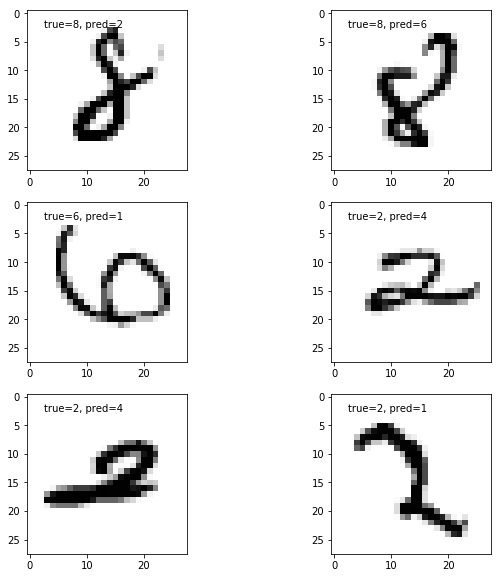

In [27]:
correct_vals = sess.run(correct_prediction, 
                        feed_dict={x: mnist.train.images, y_: mnist.train.labels})
pred_vals = sess.run(y, feed_dict={x: mnist.train.images} )

cntFalse = 0
for cv in correct_vals:
    if cv==False:
        cntFalse+=1
print(cntFalse, "incorrect labels out of",  len(correct_vals))


fig = plt.figure(figsize=(10,10))

cntFalse = 0
for i, cv in enumerate(correct_vals):
    
    if cv==False:
        cntFalse +=1

        ax = fig.add_subplot(3,2,cntFalse)
        im = np.reshape(mnist.train.images[i,:], [28,28])

        label = np.argmax(mnist.train.labels[i,:])
        pred_label = np.argmax(pred_vals[i,:])
        
        ax.imshow(im, cmap='Greys')
        ax.text(left, top, 'true=' + str(label) + ', pred=' + str(pred_label))
        
    if cntFalse==6:
        break

In [28]:
sess.close()

# Exercício

### Explique de acordo com o valor da acurácia se os valores foram bons?

Foi usado Softmax, teria outro algoritmo que poderia ser empregado e que poderia melhorar a acurácia?

O algoritmo conseguiu aprender e distinguir as imagens de acordo com os valores de predição?